In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
data = pd.read_csv('Data/dengue_features_train_raw.csv', index_col = 'week_start_date', parse_dates=['week_start_date'])
data_valid = pd.read_csv('Data/dengue_features_test_raw.csv', index_col = 'week_start_date', parse_dates=['week_start_date'])

# Missing Values

In [3]:
all_data = pd.concat([data, data_valid], axis = 0)

In [4]:
sj = all_data[all_data.city == 'sj']
iq = all_data[all_data.city == 'iq']

In [5]:
sj = sj.drop(['city', 'year', 'weekofyear'], axis = 1)
iq = iq.drop(['city', 'year', 'weekofyear'], axis = 1)

In [6]:
sj.head()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
week_start_date,,,,,,,,,,,,,,,,,,,,
1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [7]:
def weekplot(data, n_sample = 5):
    years = data.index.year.unique()
    selected_year = np.random.choice(years, n_sample)
    data_splitted = dict()
    for year in selected_year:
        annual = data[data.index.year == year]
        annual.index = annual.index.weekofyear
        data_splitted[year] = annual
        #plt.plot(annual, label = year)
    temp_frame = pd.DataFrame(data_splitted)
    sns.lineplot(data = temp_frame)
    return temp_frame

def groupplot(data, cols):
    no_plots = math.ceil(len(cols) / 2)
    for i in range(len(cols)):
        plt.subplot(no_plots, 2, i+1)
        _ = weekplot(data[cols[i]])
        plt.title(cols[i])
    return

def weekly_replace(data):
    for i in data.index:
        if math.isnan(data[i]):
            data.loc[i] = data[data.index.weekofyear == i.weekofyear].mean(skipna = True)
    return data

def monthly_replace(data):
    for i in data.index:
        if math.isnan(data[i]):
            data.loc[i] = data[data.index.to_period('M') == i.to_period('M')].mean(skipna = True)
    return data

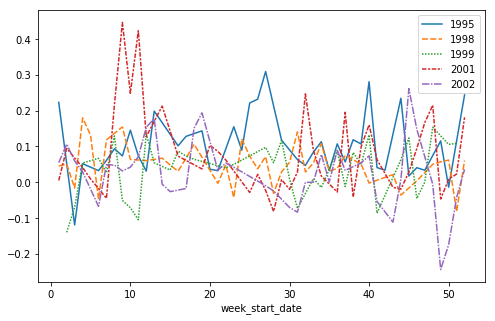

In [8]:
np.random.seed(1)
plt.figure(figsize = (8,5))
temp = weekplot(sj.ndvi_ne, n_sample = 5)

<h1 style="color:red;"> San Juan</h1>

## NDVI Features

In [9]:
sj_ndvi_corr = sj[[col for col in sj if col[:4] == 'ndvi']].corr()
sj_ndvi_corr

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw
ndvi_ne,1.000000,0.653436,0.189718,0.184195
ndvi_nw,0.653436,1.000000,0.181772,0.228402
ndvi_se,0.189718,0.181772,1.000000,0.823625
ndvi_sw,0.184195,0.228402,0.823625,1.000000


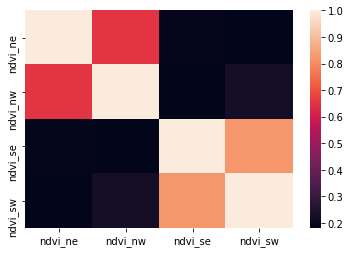

In [10]:
sns.heatmap(sj_ndvi_corr)
plt.show()

For San Juan, ndvi_ne and ndvi_nw are highly correlated, ndvi_se and ndvi_sw are also highly correlated.

In [11]:
sj_ndvi = sj[[col for col in sj.columns if col[:4] == 'ndvi']]
sj_ndvi.isnull().sum(axis = 1).value_counts()

0    942
1    214
4     20
2     20
dtype: int64

In [12]:
#sj_ndvi.iloc[np.argwhere(sj_ndvi.isnull().sum(axis = 1) == 2).reshape(-1)]

### Impute rows which contain only one missing value first.

In [13]:
sj_ndvi.iloc[np.argwhere(sj_ndvi.isnull().sum(axis = 1) == 1).reshape(-1)].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 214 entries, 1990-06-04 to 2013-03-05
Data columns (total 4 columns):
ndvi_ne    20 non-null float64
ndvi_nw    194 non-null float64
ndvi_se    214 non-null float64
ndvi_sw    214 non-null float64
dtypes: float64(4)
memory usage: 8.4 KB


/Users/pasin/opt/anaconda3/envs/env01/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


In [14]:
sj_ndvi.iloc[np.argwhere(sj_ndvi.isnull().sum(axis = 1) == 1).reshape(-1)].isnull().sum()

ndvi_ne    194
ndvi_nw     20
ndvi_se      0
ndvi_sw      0
dtype: int64

First, we will impute the records in which the ndvi_nw is not null but the ndvi_ne is null. We will build a simple regression model to impute the missing values, regardless of time.

In [15]:
# Those observations with only ndvi_ne is null
sj_ndvi_ne_impute = sj_ndvi.iloc[np.argwhere(sj_ndvi.isnull().sum(axis = 1) == 1).reshape(-1)][sj_ndvi['ndvi_ne'].isnull()]
sj_ndvi_ne_impute.shape

/Users/pasin/opt/anaconda3/envs/env01/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(194, 4)

In [16]:
# We will build a regression model from the observations in which both ndvi_ne and ndvi_nw are not null.

sj_ndvi_ne_train = sj_ndvi[['ndvi_ne', 'ndvi_nw']].dropna(how = 'any')
sj_ndvi_ne_train.head()

,ndvi_ne,ndvi_nw
week_start_date,,
1990-04-30,0.122600,0.103725
1990-05-07,0.169900,0.142175
1990-05-14,0.032250,0.172967
1990-05-21,0.128633,0.245067
1990-05-28,0.196200,0.262200


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

In [18]:
sj_ndvi_ne_model = LinearRegression()
sj_ndvi_ne_model.fit(sj_ndvi_ne_train[['ndvi_nw']], sj_ndvi_ne_train['ndvi_ne'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
print('The MSE from imputing ndvi_ne with the ndvi_nw model is %.4f'%
    mse(sj_ndvi_ne_train['ndvi_ne'], sj_ndvi_ne_model.predict(sj_ndvi_ne_train[['ndvi_nw']])))

The MSE from imputing ndvi_ne with the ndvi_nw model is 0.0075


In [20]:
print('R2 = %.4f'%
    sj_ndvi_ne_model.score(sj_ndvi_ne_train[['ndvi_nw']], sj_ndvi_ne_train['ndvi_ne']))

R2 = 0.4270


In [21]:
ndvi_ne_imputed = sj_ndvi_ne_model.predict(sj_ndvi_ne_impute[['ndvi_nw']])
sj_ndvi_ne_impute['ndvi_ne'] = ndvi_ne_imputed

Next, we will impute the records in which the ndvi_ne is not null but the ndvi_nw is null. We will build a simple regression model to impute the missing values, regardless of time.

In [22]:
# Those observations with only ndvi_nw is null
sj_ndvi_nw_impute = sj_ndvi.iloc[np.argwhere(sj_ndvi.isnull().sum(axis = 1) == 1).reshape(-1)][sj_ndvi['ndvi_nw'].isnull()]
sj_ndvi_nw_impute.shape

/Users/pasin/opt/anaconda3/envs/env01/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)
/Users/pasin/opt/anaconda3/envs/env01/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(20, 4)

In [23]:
# We will build a regression model from the observations in which both ndvi_ne and ndvi_nw are not null.

sj_ndvi_nw_train = sj_ndvi[['ndvi_ne', 'ndvi_nw']].dropna(how = 'any')
sj_ndvi_nw_train.head()

,ndvi_ne,ndvi_nw
week_start_date,,
1990-04-30,0.122600,0.103725
1990-05-07,0.169900,0.142175
1990-05-14,0.032250,0.172967
1990-05-21,0.128633,0.245067
1990-05-28,0.196200,0.262200


In [24]:
sj_ndvi_nw_model = LinearRegression()
sj_ndvi_nw_model.fit(sj_ndvi_ne_train[['ndvi_ne']], sj_ndvi_ne_train['ndvi_nw'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
print('The MSE from imputing ndvi_ne with the ndvi_nw model is %.4f'%
    mse(sj_ndvi_nw_train['ndvi_nw'], sj_ndvi_ne_model.predict(sj_ndvi_nw_train[['ndvi_ne']])))

The MSE from imputing ndvi_ne with the ndvi_nw model is 0.0063


In [26]:
print('R2 = %.4f'%
    sj_ndvi_nw_model.score(sj_ndvi_ne_train[['ndvi_ne']], sj_ndvi_ne_train['ndvi_nw']))

R2 = 0.4270


In [27]:
ndvi_nw_imputed = sj_ndvi_nw_model.predict(sj_ndvi_nw_impute[['ndvi_ne']])
sj_ndvi_nw_impute['ndvi_nw'] = ndvi_nw_imputed

### Impute rows which contain two missing values.

In [28]:
sj_ndvi.iloc[np.argwhere(sj_ndvi.isnull().sum(axis = 1) == 2).reshape(-1)].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 1991-03-12 to 2012-11-11
Data columns (total 4 columns):
ndvi_ne    0 non-null float64
ndvi_nw    0 non-null float64
ndvi_se    20 non-null float64
ndvi_sw    20 non-null float64
dtypes: float64(4)
memory usage: 800.0 bytes


/Users/pasin/opt/anaconda3/envs/env01/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


In [29]:
sj_ndvi.iloc[np.argwhere(sj_ndvi.isnull().sum(axis = 1) == 2).reshape(-1)]

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw
week_start_date,,,,
1991-03-12,NaN,NaN,0.213250,0.240543
1991-07-30,NaN,NaN,0.190643,0.159329
1992-03-25,NaN,NaN,0.134843,0.106800
1993-12-10,NaN,NaN,0.163233,0.082833
1994-04-23,NaN,NaN,0.152829,0.175457
1994-09-17,NaN,NaN,0.095500,0.192925
1997-03-05,NaN,NaN,0.227700,0.267014
1998-11-19,NaN,NaN,0.253743,0.216614
2001-08-27,NaN,NaN,0.221271,0.201129


There is only one case which has two missing values, which are observations in which the ndvi_ne and ndvi_nw are null. <br>

The correlation between north and south variables is not many, indicating low degree of relationship between those variables. Hence, we will try to use the descriptive statistics within themselves to fill the missing values.

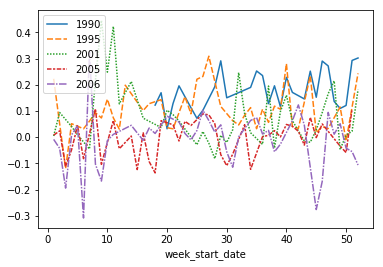

In [30]:
_ = weekplot(sj_ndvi['ndvi_ne'])

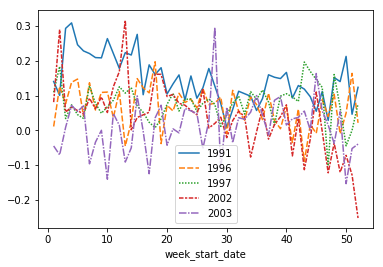

In [31]:
_ = weekplot(sj_ndvi['ndvi_nw'])

<h2 style="color:black">Impute with Mean</h2>

Let's compare the variation of the <b>ndvi_ne</b> and <b>ndvi_nw</b> in two cases. First, within the week number. Second, within the year.<br>
We will investigate the variations to figure out in which case has less variation, then impute the missing values with its mean.
<br><br>
Note: we are also going to use this method on the null cases which contains four missing values.

In [32]:
sj_year_missed = sj_ndvi[sj_ndvi.isnull().sum(axis = 1) == 2].index.year

### ndvi_ne

In [33]:
sj_year_var = sj['ndvi_ne'].groupby(sj.index.year).var()
sj_week_var = sj['ndvi_ne'].groupby(sj.index.weekofyear).var()

In [34]:
print('Variance within year =', sj_year_var.mean())
print('Variance within weekofyear =', sj_week_var.mean())

Variance within year = 0.010696931955778888
Variance within weekofyear = 0.012951868938658375


### ndvi_nw

In [35]:
sj_year_var = sj['ndvi_nw'].groupby(sj.index.year).var()
sj_week_var = sj['ndvi_nw'].groupby(sj.index.weekofyear).var()

In [36]:
print('Variance within year =', sj_year_var.mean())
print('Variance within weekofyear =', sj_week_var.mean())

Variance within year = 0.006164578179347264
Variance within weekofyear = 0.008434845325573636


### ndvi_se

In [37]:
sj_year_var = sj['ndvi_se'].groupby(sj.index.year).var()
sj_week_var = sj['ndvi_se'].groupby(sj.index.weekofyear).var()

In [38]:
print('Variance within year =', sj_year_var.mean())
print('Variance within weekofyear =', sj_week_var.mean())

Variance within year = 0.003375391540071314
Variance within weekofyear = 0.0034435854170966865


### ndvi_sw

In [39]:
sj_year_var = sj['ndvi_se'].groupby(sj.index.year).var()
sj_week_var = sj['ndvi_se'].groupby(sj.index.weekofyear).var()

In [40]:
print('Variance within year =', sj_year_var.mean())
print('Variance within weekofyear =', sj_week_var.mean())

Variance within year = 0.003375391540071314
Variance within weekofyear = 0.0034435854170966865


For all features, replace null with year mean.

In [41]:
year_mean = sj_ndvi.groupby(sj_ndvi.index.year).mean()

## Imputation

Steps
1. Impute the rows with only one missing value first
2. Impute the rest

In [42]:
def imputing(data, insert, col):
    new = data.copy()
    for i in insert.index:
        new.loc[i, col] = insert.loc[i, col]
    return new

In [43]:
# Step 1

# ndvi_ne
sj_ndvi_ne_imputed = imputing(sj, sj_ndvi_ne_impute, 'ndvi_ne')

# ndvi_nw
sj_ndvi_nw_imputed = imputing(sj_ndvi_ne_imputed, sj_ndvi_nw_impute, 'ndvi_nw')

In [44]:
# Step 2
for i in sj_ndvi_nw_imputed.index:
    for col in ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']:
        if math.isnan(sj_ndvi_nw_imputed.loc[i, col]):
            sj_ndvi_nw_imputed.loc[i, col] = year_mean.loc[i.year, col]

In [45]:
sj_ndvi_nw_imputed.isnull().sum()

ndvi_ne                                   0
ndvi_nw                                   0
ndvi_se                                   0
ndvi_sw                                   0
precipitation_amt_mm                     11
reanalysis_air_temp_k                     8
reanalysis_avg_temp_k                     8
reanalysis_dew_point_temp_k               8
reanalysis_max_air_temp_k                 8
reanalysis_min_air_temp_k                 8
reanalysis_precip_amt_kg_per_m2           8
reanalysis_relative_humidity_percent      8
reanalysis_sat_precip_amt_mm             11
reanalysis_specific_humidity_g_per_kg     8
reanalysis_tdtr_k                         8
station_avg_temp_c                        8
station_diur_temp_rng_c                   8
station_max_temp_c                        8
station_min_temp_c                        8
station_precip_mm                         8
dtype: int64

In [46]:
# Rename
sj_ndvi_imputed = sj_ndvi_nw_imputed.copy()

#del sj_ndvi_ne_impute, sj_ndvi_nw_impute, sj_ndvi_nw_train, sj_ndvi_ne_train, sj_year_missed, sj_week_var
#del sj_year_var, sj_ndvi_ne_model, sj_ndvi_nw_model

## The Other Features

In [47]:
climate_cols = [col for col in sj.columns if col[:4] != 'ndvi']

Plot weekly values to inspect the seasonal pattern.

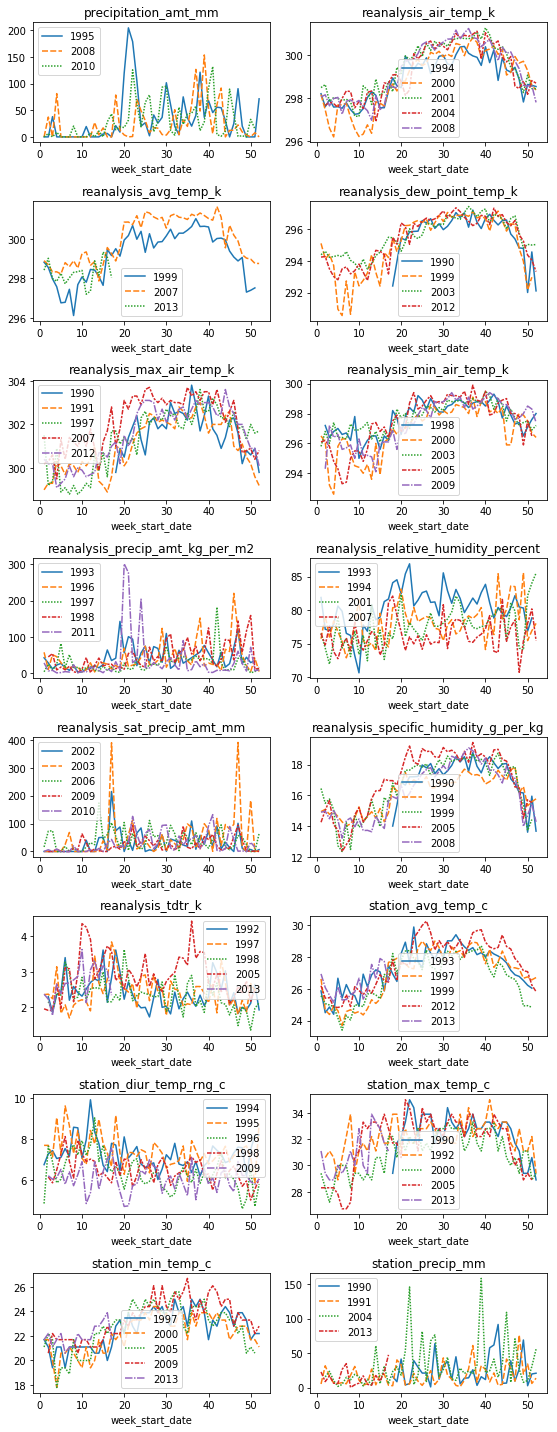

In [48]:
plt.figure(figsize = (8, 20))

"""for i in range(len(climate_cols)):
    plt.subplot(no_plots, 2, i+1)
    _ = weekplot(sj[climate_cols[i]])
    plt.title(climate_cols[i])"""

groupplot(sj, climate_cols)
plt.tight_layout()

## Temperature Features

For temperature features, we will impute with the mean in the respective week, then month (if week is still not enough).

In [49]:
temperature_cols = [col for col in sj.columns if 'temp' in col]
temperature_cols.append('reanalysis_tdtr_k')

In [50]:
temperature_cols

['reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'reanalysis_tdtr_k']

In [51]:
for col in temperature_cols:
    weekly_replace(sj_ndvi_imputed[col])
    monthly_replace(sj_ndvi_imputed[col])

In [52]:
sj_ndvi_imputed.isnull().sum()

ndvi_ne                                   0
ndvi_nw                                   0
ndvi_se                                   0
ndvi_sw                                   0
precipitation_amt_mm                     11
reanalysis_air_temp_k                     0
reanalysis_avg_temp_k                     0
reanalysis_dew_point_temp_k               0
reanalysis_max_air_temp_k                 0
reanalysis_min_air_temp_k                 0
reanalysis_precip_amt_kg_per_m2           8
reanalysis_relative_humidity_percent      8
reanalysis_sat_precip_amt_mm             11
reanalysis_specific_humidity_g_per_kg     8
reanalysis_tdtr_k                         0
station_avg_temp_c                        0
station_diur_temp_rng_c                   0
station_max_temp_c                        0
station_min_temp_c                        0
station_precip_mm                         8
dtype: int64

## Precipitation Features

In [53]:
precip_cols = [col for col in sj.columns if 'precip' in col]

In [54]:
precip_cols

['precipitation_amt_mm',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_sat_precip_amt_mm',
 'station_precip_mm']

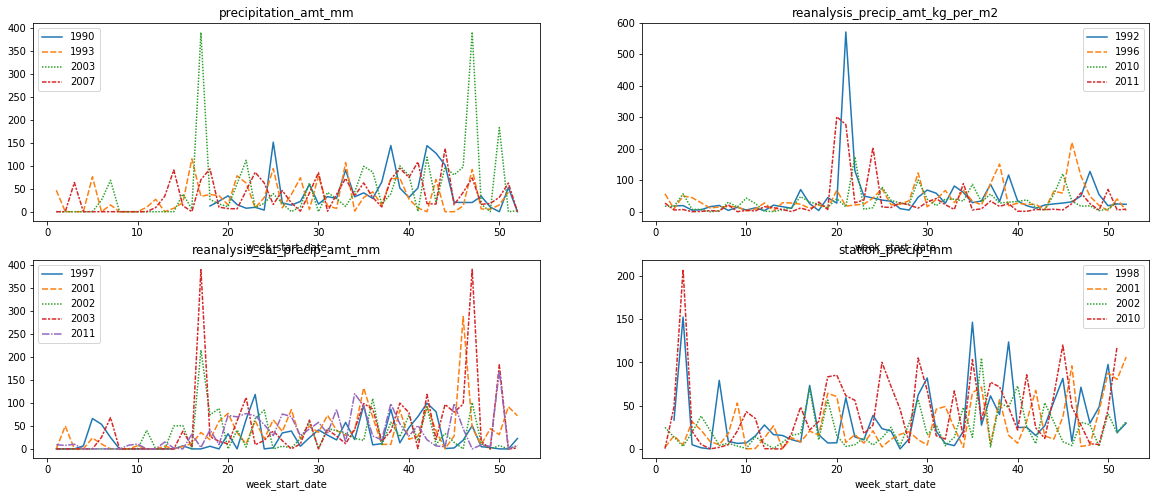

In [55]:
plt.figure(figsize = (20,8))
groupplot(sj, precip_cols)

Apply the same method from the temperature features.

In [56]:
for col in precip_cols:
    weekly_replace(sj_ndvi_imputed[col])
    monthly_replace(sj_ndvi_imputed[col])

In [57]:
sj_ndvi_imputed.isnull().sum()

ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     8
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    8
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
dtype: int64

## Humidity Features

In [58]:
humid_cols = [col for col in sj.columns if 'humidity' in col]
humid_cols

['reanalysis_relative_humidity_percent',
 'reanalysis_specific_humidity_g_per_kg']

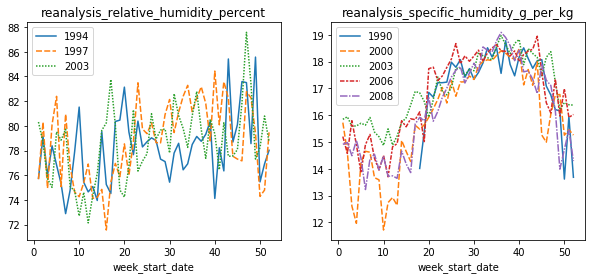

In [59]:
plt.figure(figsize = (10,4))
groupplot(sj_ndvi_imputed, humid_cols)

Apply the same method.

In [60]:
for col in humid_cols:
    weekly_replace(sj_ndvi_imputed[col])
    monthly_replace(sj_ndvi_imputed[col])

In [61]:
#sj.head()
sj_ndvi_imputed.head()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
week_start_date,,,,,,,,,,,,,,,,,,,,
1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [62]:
# Save the imputed data
sj_ndvi_imputed.index = sj.index
#sj_ndvi_imputed.to_csv('Data/sj_features_imputed_20200519.csv')

<h1 style="color: red;">Iquitos</h1>

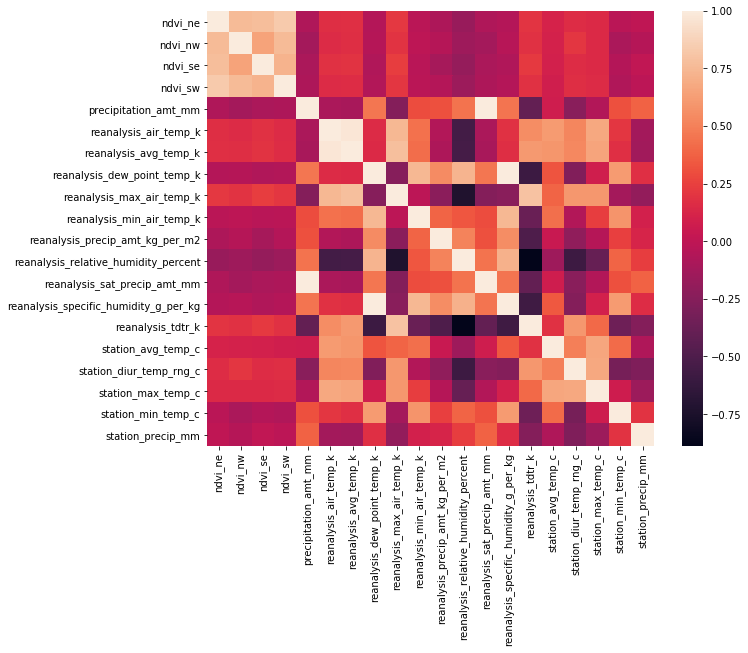

In [63]:
# Heatmap
plt.figure(figsize = (10,8))
sns.heatmap(iq.corr())

## NDVI Features

In [64]:
ndvi_cols = [col for col in iq.columns if col[:4] == 'ndvi']

In [65]:
ndvi_cols

['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']

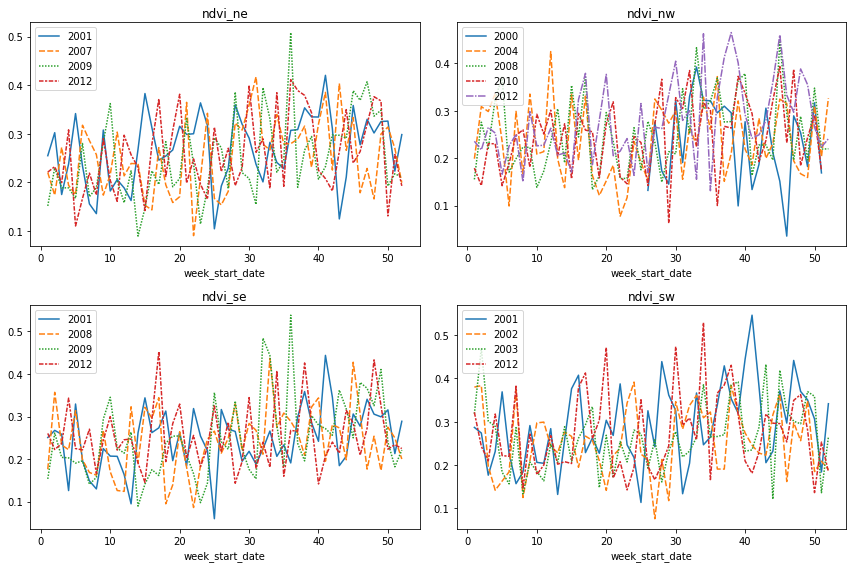

In [66]:
plt.figure(figsize = (12,8))
groupplot(iq, ndvi_cols)
plt.tight_layout()

In [67]:
# Check for correlations
iq[ndvi_cols].corr()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw
ndvi_ne,1.000000,0.760600,0.773669,0.834810
ndvi_nw,0.760600,1.000000,0.650690,0.761615
ndvi_se,0.773669,0.650690,1.000000,0.719914
ndvi_sw,0.834810,0.761615,0.719914,1.000000


In [68]:
iq_ndvi = iq[ndvi_cols]

iq_ndvi.isnull().sum(axis = 1).value_counts()

0    673
4      3
dtype: int64

In [69]:
iq_ndvi[iq_ndvi.isnull().sum(axis = 1) == 4]

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw
week_start_date,,,,
2002-01-29,NaN,NaN,NaN,NaN
2005-01-01,NaN,NaN,NaN,NaN
2010-01-01,NaN,NaN,NaN,NaN


In the missing value data, we can see that there is only one case, which is all ndvi features are null. Thus, we will impute with the average value of a variable before and after the week, known as linear interpolation.

In [70]:
iq_ndvi_reindex = iq_ndvi.reset_index()
#iq_null_index = iq_ndvi[iq_ndvi.isnull().sum(axis = 1) == 4].reset_index().index
iq_null_index = iq_ndvi_reindex[iq_ndvi_reindex.isnull().sum(axis = 1) == 4].index

for i in iq_null_index:
    for col in ndvi_cols:
        iq_ndvi[col].iloc[i] = np.mean([iq_ndvi[col].iloc[i-1], iq_ndvi[col].iloc[i+1]])

/Users/pasin/opt/anaconda3/envs/env01/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Insert them back in the original dataset.

In [71]:
for col in iq_ndvi.columns:
    iq[col] = iq_ndvi[col]

In [72]:
# Check the result

iq.isnull().sum()

ndvi_ne                                   0
ndvi_nw                                   0
ndvi_se                                   0
ndvi_sw                                   0
precipitation_amt_mm                      4
reanalysis_air_temp_k                     4
reanalysis_avg_temp_k                     4
reanalysis_dew_point_temp_k               4
reanalysis_max_air_temp_k                 4
reanalysis_min_air_temp_k                 4
reanalysis_precip_amt_kg_per_m2           4
reanalysis_relative_humidity_percent      4
reanalysis_sat_precip_amt_mm              4
reanalysis_specific_humidity_g_per_kg     4
reanalysis_tdtr_k                         4
station_avg_temp_c                       47
station_diur_temp_rng_c                  47
station_max_temp_c                       15
station_min_temp_c                       15
station_precip_mm                        19
dtype: int64

## The Other Features

In [73]:
other_cols = [col for col in iq.columns if col[:4] != 'ndvi']

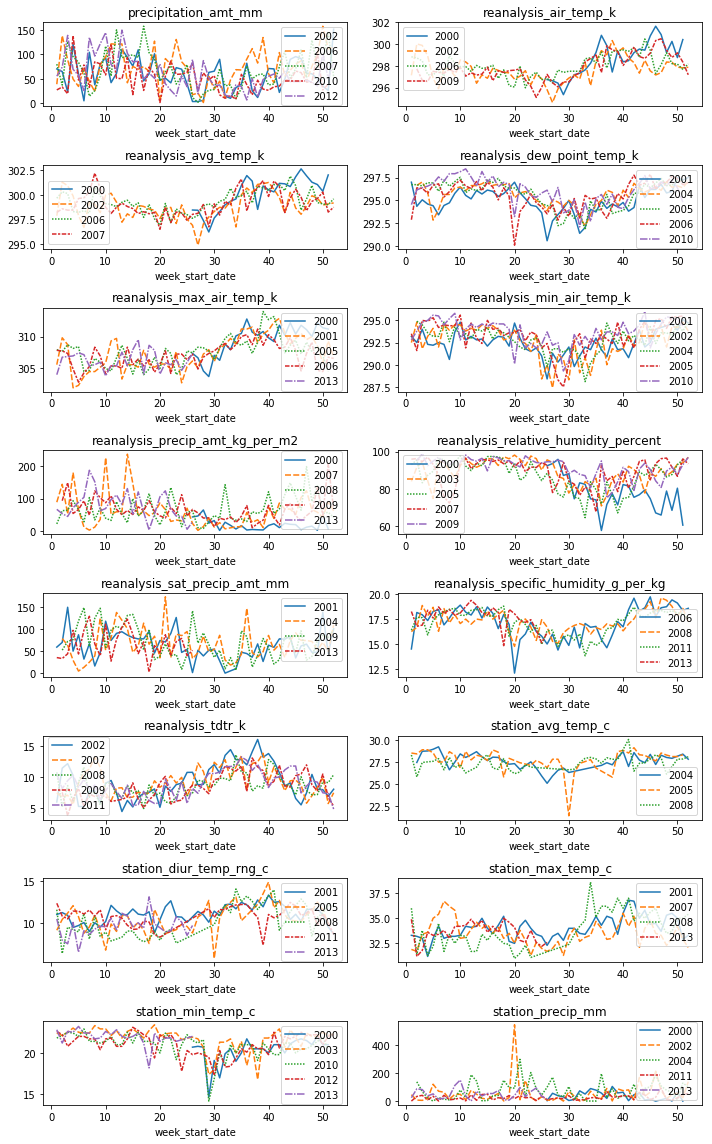

In [74]:
plt.figure(figsize = (10,16))
groupplot(iq, other_cols)
plt.tight_layout()

## Temperature Features

In [75]:
temp_cols = [col for col in iq.columns if 'temp' in col]
temp_cols.append('reanalysis_tdtr_k')
temp_cols

['reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'reanalysis_tdtr_k']

In [76]:
for col in temp_cols:
    weekly_replace(iq[col])
    monthly_replace(iq[col])

In [77]:
# Check the result

iq.isnull().sum()

ndvi_ne                                   0
ndvi_nw                                   0
ndvi_se                                   0
ndvi_sw                                   0
precipitation_amt_mm                      4
reanalysis_air_temp_k                     0
reanalysis_avg_temp_k                     0
reanalysis_dew_point_temp_k               0
reanalysis_max_air_temp_k                 0
reanalysis_min_air_temp_k                 0
reanalysis_precip_amt_kg_per_m2           4
reanalysis_relative_humidity_percent      4
reanalysis_sat_precip_amt_mm              4
reanalysis_specific_humidity_g_per_kg     4
reanalysis_tdtr_k                         0
station_avg_temp_c                        0
station_diur_temp_rng_c                   0
station_max_temp_c                        0
station_min_temp_c                        0
station_precip_mm                        19
dtype: int64

## Precipitation Features

In [78]:
precip_cols = [col for col in iq.columns if 'precip' in col]

In [79]:
precip_cols

['precipitation_amt_mm',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_sat_precip_amt_mm',
 'station_precip_mm']

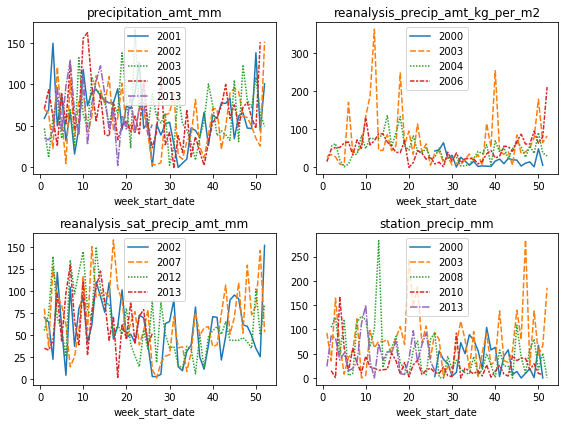

In [80]:
plt.figure(figsize = (8,6))
groupplot(iq, precip_cols)
plt.tight_layout()

We will use linear interpolation on reanalysis precipitation amount (kg/m2) and station precipitation, whereas the two others we will use the weekly-monthly imputation.

In [81]:
imputed_col = [precip_cols[i] for i in [0, 2]]
interp_col = [precip_cols[i] for i in [1, 3]]
print('Columns for imputation:', imputed_col)
print('Columns for interpolation:', interp_col)

Columns for imputation: ['precipitation_amt_mm', 'reanalysis_sat_precip_amt_mm']
Columns for interpolation: ['reanalysis_precip_amt_kg_per_m2', 'station_precip_mm']


In [82]:
# Imputation
for col in imputed_col:
    weekly_replace(iq[col])
    monthly_replace(iq[col])

In [83]:
# Linear Interpolation
def linear_interpolate(original_data, cols):
    data = original_data.reset_index()
    for col in cols:
        indices = data[col][data[col].isnull()].index
        for i in indices:
            original_data[col].iloc[i] = np.mean([data[col].iloc[i-1], data[col].iloc[i+1]])
    return

In [84]:
# Interpolation
linear_interpolate(iq, interp_col)

In [85]:
iq.isnull().sum()

ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     4
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    4
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        4
dtype: int64

We can see that there are still missing values in the station_precip_mm columns. This is because there are two consecutive missing values, of which the one-step linear interpolation does not work. Hence, we will implement two-step linear interpolation.

In [86]:
iq_reset = iq.reset_index()
indices = iq_reset[iq_reset.station_precip_mm.isnull()].index
print(indices)
index_pair = [[indices[0] - 1, indices[1] + 1], [indices[2] - 1, indices[3] + 1]]
print(index_pair)

Int64Index([336, 337, 494, 495], dtype='int64')
[[335, 338], [493, 496]]


In [87]:
for pair in index_pair:
    temp = np.mean(iq['station_precip_mm'].iloc[pair])
    print(temp)
    iq['station_precip_mm'].iloc[pair[0] + 1: pair[1]] = temp

72.15
23.1


In [88]:
iq.isnull().sum()

ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     4
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    4
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
dtype: int64

## Humidity Features

In [89]:
humid_cols = [col for col in sj.columns if 'humidity' in col]
humid_cols

['reanalysis_relative_humidity_percent',
 'reanalysis_specific_humidity_g_per_kg']

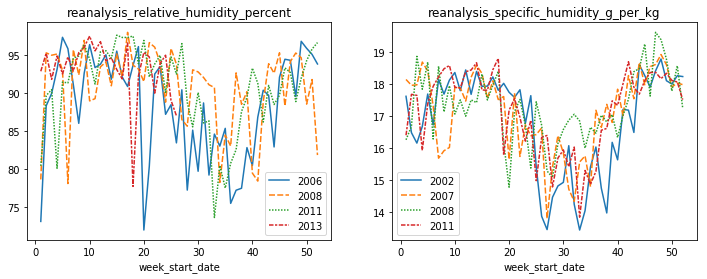

In [90]:
np.random.seed(2)
plt.figure(figsize = (12,4))
groupplot(iq, humid_cols)

We will use the weekly-monthly imputation method

In [91]:
for col in humid_cols:
    weekly_replace(iq[col])
    monthly_replace(iq[col])

In [92]:
iq.isnull().sum()

ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
dtype: int64

In [93]:
# save imputed data
#iq.to_csv('Data/iq_features_imputed_20200520.csv')

Now all missing values have been imputed. Next, we will look at the relations between our target variable, number of cases occurrences, and our independent variables. <br><br>
See you next time!